In [46]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import layers
from keras.utils.vis_utils import plot_model


def month_day(month):
  if month == 2:
    return 28
  elif month < 8:
    return 30+month%2
  else:
    return 31-month%2

def day_count(month):
  sum = 0
  for i in range(1,month):
    sum += month_day(i)
  return sum

def load_data_set(data):
  col_name = list(data.columns)
  col_name.pop(0)
  _X=[]
  _y=[]
  x_values=[]
  y_values=[]
  for i in range(0,len(col_name)):
    date = col_name[i]
    y_values = list(data[date])
    x_values = date.split('-')
    x_values = [int(x) for x in x_values]
    for j in range(0,24):
      sum=0
      sum += (x_values[0] - 2020)*8760 + 24 + day_count(x_values[1])*24 + (x_values[2]-1)*24 + j
      _X.append(sum)
      _y.append(y_values[j])
  return _X,_y

def load_temp_set(data):
  col_name = list(data.columns)
  date = col_name[0]
  temp = col_name[1]
  rain = col_name[2]
  wind = col_name[3]
  humid = col_name[4]
  sunshine = col_name[5]
  radiation = col_name[6]
  cloud = col_name[7]
  date_set = list(data[date])
  temp_set = list(data[temp])
  rain_set = list(data[rain])
  wind_set = list(data[wind])
  humid_set = list(data[humid])
  sunshine_set = list(data[sunshine])
  radiation_set = list(data[radiation])
  cloud_set = list(data[cloud])

  date_sum = []
  for i in date_set:
    sum = 0
    a = i.split(' ')
    date = a[0].split('-')
    date = [int(x) for x in date]
    sum += (date[0] - 2020)*8760 + 24 + day_count(date[1])*24 + (date[2]-1)*24
    hour = a[1].split(':')
    hour = [int(x) for x in hour]
    sum += hour[0]
    date_sum.append(sum)
  return date_sum,temp_set,rain_set,wind_set,humid_set,sunshine_set,radiation_set,cloud_set


In [47]:
load_data = pd.read_csv('sol_generated_power.csv')
load_temp_val = pd.read_csv('climate_2022_0629_0809.csv',encoding='cp949')
load_temp_val = load_temp.fillna(0)

data_X, data_y = load_data_set(load_data)

date_set,temp_set,rain_set,wind_set,humid_set,sunshine_set,radiation_set,cloud_set = load_temp_set(load_temp)

In [48]:
input_0629 = [[temp_set[i],humid_set[i], radiation_set[i], cloud_set[i]]for i in range(24)]

In [49]:
input_0629

[[26.2, 97, 0.0, 9.0],
 [26.1, 96, 0.0, 9.0],
 [26.3, 94, 0.0, 9.0],
 [26.5, 94, 0.0, 9.0],
 [26.5, 94, 0.0, 10.0],
 [26.2, 98, 0.05, 10.0],
 [25.6, 99, 0.1, 10.0],
 [25.0, 99, 0.28, 10.0],
 [25.3, 99, 0.66, 10.0],
 [25.8, 99, 1.14, 10.0],
 [26.5, 99, 1.97, 10.0],
 [28.2, 99, 1.73, 10.0],
 [28.0, 95, 1.8, 10.0],
 [27.8, 97, 1.25, 10.0],
 [28.2, 98, 1.01, 10.0],
 [28.8, 88, 1.41, 10.0],
 [28.1, 92, 0.95, 10.0],
 [27.2, 99, 0.35, 10.0],
 [26.7, 99, 0.21, 10.0],
 [26.2, 99, 0.08, 10.0],
 [25.3, 99, 0.0, 10.0],
 [25.4, 99, 0.0, 10.0],
 [25.0, 99, 0.0, 5.0],
 [25.1, 99, 0.0, 10.0]]

1/1 [==============================] - 0s 90ms/step
[[2.39221007e-03]
 [2.40913406e-03]
 [2.38292664e-03]
 [2.36250833e-03]
 [2.45207548e-03]
 [2.78840959e-03]
 [3.28526646e-03]
 [3.66307373e+01]
 [1.23771996e+02]
 [2.19858932e+02]
 [3.77674316e+02]
 [3.34796783e+02]
 [3.48651093e+02]
 [2.43785370e+02]
 [1.93556580e+02]
 [2.75569550e+02]
 [1.74445206e+02]
 [4.42978172e+01]
 [5.34018660e+00]
 [3.05193663e-03]
 [2.44216621e-03]
 [2.43936479e-03]
 [2.35953927e-03]
 [2.44776905e-03]]


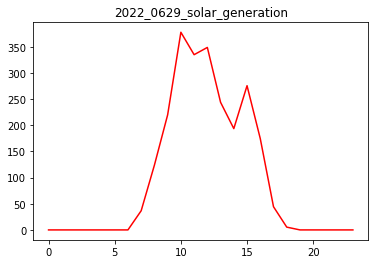

In [50]:
new_model = keras.models.load_model('best-model_June_July5.tf')

import matplotlib.pyplot as plt
predict = new_model.predict(input_0629)
# plt.plot(y[751*24:],'b')
plt.plot(predict,'r')
plt.title('2022_0629_solar_generation')
print(predict)
# new_model.evaluate(X[751*24:],y[751*24:])